# erthaos-23

### README

Der Code stellt einen digitalen Assistent für die automatische Erkennung der gesuchten Motive.

Anpassbare Zeilen:

(#3 und #103) Pfad zu der eingabedatei.

(#5 und #105) Subkorpus anpassen (falls vorhanden, wenn nicht leer lassen '')

(#6 und #106) Der Attributwert bestimmt die Herkunft der zu analysierenden Textgruppe (des Repertoires). Die Filter können mit den 'or' und 'and' Operatoren ergänzt werden, z. B.:  

if ('deu' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']

    or 'ita' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']): 

(#34) NLTK-Stoppwortliste mit händisch eingetragene Wortformen ergänzen.
 
(#37) NLTK-Stoppwortliste für die bestimmte Sprache.
    
(#60) Anfrage anpassen. Die Werte von 'gesep_1' bis 'gesep_4' können nach der in der Motivliste ausgewälte Zeilen, oder ihre Bestandteilen ausgefült werden und anschließend in der Anfragezeile (#62) als Anfrage mit 'or' und/oder 'and' Opperatoren bestimmen.

(#78) Anzahl der Merkmale, die in der Visualisierung dargestellt werden sollen anpassen, sie darf nicht größer als gesamte Anzahl der Wörtersein (#77).

(#96) Schwelenwert anpassen. Dafür wird die Nummer des Merkmals mit minimal-positivem Koefizient gewählt (#95).
    
(#147-#157) Vorhersage durch Logistic Regression hat nur anschauliche Funktion um die Efektivität zwischen ihr und Vorhersage durch Cosine Similarity zu demonstrieren.

# Trainingsdaten aufbereiten und transformieren

In [131]:
maerchen = ""  #1 Eine leere Zeichenkette, in der Daten für Märchen gesammelt werden.
import xml.etree.ElementTree as ET  #2 Importieren der ElementTree-Bibliothek zum Parsen von XML.
root_node = ET.parse('Textkorpus.xml').getroot()  #3 Parsen der XML-Datei und Zugriff auf das Wurzelelement.
never_saved = True  #4 Ein boolean-Wert, der angibt, ob Daten bereits gespeichert wurden oder nicht.
#5 Iteration durch jedes 'text'-Element in der XML-Datei.
for corp in root_node.findall (".//{http://www.tei-c.org/ns/1.0}teiCorpus"):
    if "" in corp.attrib["n"]:
        for ganze in corp.findall(".//{http://www.tei-c.org/ns/1.0}text"):
            #6 Überprüfung, ob das Attribut 'x' in der 'id'-Eigenschaft des 'text'-Elements vorhanden ist.
            if ('zyx_' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']):
                #7 Iteration durch jeden Absatz im 'body' des 'text'-Elements.
                for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
                    for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                        #8 Iteration durch jede 'seg'-Phrase im Absatz.
                        for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}seg"):
                            #9 Extrahieren von Labels und Inhalten aus den Attributen und dem Text der Phrase.
                            labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                            labelb1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b1}ana']
                            labelb2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b2}ana']
                            labelb3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b3}ana']
                            labelb4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b4}ana']
                            labelb5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b5}ana']
                            labelc1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c1}ana']
                            labelc2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c2}ana']
                            labelc3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c3}ana']
                            labelc4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c4}ana']
                            labelc5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c5}ana']
                            labeld = phrase.attrib['{www.dglab.uni-jena.de/vmf/d}ana']
                            #10 Die Quelle wird aus dem Attribut 'id' der 'ganze'-Schleife extrahiert.
                            quelle = ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                            #11 Der Inhalt wird in Kleinbuchstaben umgewandelt und formatiert.
                            inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                                      .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                                      .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                                      .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                                      .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                                      .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                                      .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                                      .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                                      .replace(')','').replace('*','').replace("\n","\n")
                                      .replace("'''",""))
                            #12 Überprüfung, ob labela mit 'a' beginnt und nicht gleich 'N' ist.
                            if labela.startswith('a') and labela != 'N':
                                    #13 Konstruktion des Datensatzes für das Märchen und Anhängen an die 'maerchen'-Zeichenkette.
                                    maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','+labelc2+','+
                                                 labelb3+','+labelc3+','+labelb4+','+labelc4+','+labelb5+','+labelc5+','+
                                                 labeld+','+inhalt+',0'+'\n')                       
with open("text.csv", 'w', encoding='utf-8') as f:
     #14 Schreiben der Kopfzeile in die CSV-Datei.
    f.write('quelle,labela,labelb1,labelc1,labelb2,labelc2,labelb3,labelc3,labelb4,labelc4,labelb5,labelc5,labeld,inhalt,index_binar')
    f.write('\n')
    #15 Schreiben der gesammelten Daten in die CSV-Datei.
    f.write(maerchen)

In [132]:
#16 leere Zeichenfolge, die später mit den gewünschten Daten gefüllt werden
abcd1="" 
abcd2="" 
abcd3=""  
abcd4=""  
abcd5=""  

import pandas as pd  
from collections import Counter

#17 Lesen der CSV-Datei und Laden der Daten in ein Pandas DataFrame
df = pd.read_csv('text.csv',  encoding='utf-8')

#18.1 Hinzufügen von Daten zu den entsprechenden Variablen abcd1 bis abcd5
#18.2 Hier werden die Daten aus verschiedenen Spalten des DataFrame kombiniert
abcd1 += df.quelle+','+df.labela+':'+df.labelb1+':'+df.labelc1+':'+df.labeld+':'+','+df.inhalt+',0'
abcd2 += df.quelle+','+df.labela+':'+df.labelb2+':'+df.labelc2+':'+df.labeld+':'+','+df.inhalt+',0'
abcd3 += df.quelle+','+df.labela+':'+df.labelb3+':'+df.labelc3+':'+df.labeld+':'+','+df.inhalt+',0'
abcd4 += df.quelle+','+df.labela+':'+df.labelb4+':'+df.labelc4+':'+df.labeld+':'+','+df.inhalt+',0'
abcd5 += df.quelle+','+df.labela+':'+df.labelb5+':'+df.labelc5+':'+df.labeld+':'+','+df.inhalt+',0'

#19 Zusammenführen der Daten aus den Variablen abcd1 bis abcd5
recorded=(abcd1+'\n'+abcd2+'\n'+abcd3+'\n'+abcd4+'\n'+abcd5+'\n')

#20 Schreiben der kombinierten Daten in eine neue CSV-Datei
with open("text_aw.csv", 'w', encoding='utf-8') as w:
    #21 Schreiben der Kopfzeile
    w.write('quelle,index_string,inhalt,index_binar\n')
    #22 Schreiben der vordefinierten Zeile mit Dummy-Daten
    w.write('000:ballast,ballast,ballast,0\n')
    #23 Schreiben der kombinierten Daten und Schließen der Datei
    w.write("".join(recorded))
    w.close()

In [133]:
import csv  

mom=[]  #24 Eine leere Liste zum Speichern der Zeilen, die bestimmten Kriterien entsprechen

#25 Lesen der CSV-Datei 'text_aw.csv'
with open('text_aw.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f) 
    #26 Iteration über jede Zeile in der CSV-Datei
    for line in reader:
        #27 Überprüfen, ob die Zeile nicht das Muster ':N:' in der zweiten Spalte enthält
        if ':N:' not in line[1]:
            #28 Wenn das Muster nicht vorhanden ist, wird die Zeile der Liste 'mom' hinzugefügt
            mom.append(line)

#29 Kopieren der Datei text_ax.txt
import shutil, os
with open ('text_ax.txt', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(mom)

#30 Öffnen der Datei text_ax.txt zum Lesen
with open('text_ax.txt', 'r', encoding='utf-8') as file:
    #31 Lesen des gesamten Inhalts der Datei
    filedata = file.read()

#32 Bearbeiten des Dateiinhalts, um das gewünschte Format zu erzielen
filedata = (filedata.replace(']","[', "\n").replace('"[','').replace(']"','')
            .replace(" '","").replace("'",""))

#33 Schreiben des bearbeiteten Inhalts in eine neue CSV-Datei text_ay.csv
with open('text_ay.csv', 'w', encoding='utf-8') as file:
    file.write(filedata)

In [134]:
custom_stop_word_list=['']  #34 Eine leere Liste, um benutzerdefinierte Stoppwörter zu speichern

import nltk
nltk.download('stopwords')  #35 Herunterladen der Stoppwortliste aus der NLTK-Datenbank

from nltk.corpus import stopwords  #36 Importieren der Stoppwortliste aus NLTK
NLTK_stop_words_list=stopwords.words('german')  #37 Laden der Stoppwortliste für die bestimmte Sprache
stpw = custom_stop_word_list + NLTK_stop_words_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xe78diq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
#38 Funktion zur Filterung eines CSV-Datensatzes und Zusammenführung mehrfacher Inhalte in eine Zeile
def filter_csv(input_file, output_file):
    data_to_write = []  #39 Liste zum Speichern der zu schreibenden Daten
    with open(input_file, 'r', newline='') as csvfile:  #40 Öffnen der Eingabedatei im Lesemodus
        reader = csv.reader(csvfile)  #41 Erstellen eines CSV-Lesers
        data = list(reader)  #42 Lesen aller Daten in eine Liste
        processed_values = {}  #43 Dictionary zur Nachverfolgung bereits verarbeiteter Inhalte und deren aggregierten Inhalte
        
        for row in data:  #44 Iteration über jede Zeile der Daten
            if len(row) < 4:  #45 Sicherstellen, dass die Zeile genügend Spalten hat
                continue  #46 Zeile überspringen, wenn sie nicht genügend Spalten hat
            content_key = row[2]  #47 Inhalt aus Spalte 3 als Schlüssel verwenden
            if content_key not in processed_values:  #48 Überprüfen, ob der Inhalt noch nicht verarbeitet wurde
                processed_values[content_key] = row  #49 Zeile als verarbeitet markieren und speichern
            else:
                #50 Ergänzen des Inhalts in Spalte 2 der bereits gespeicherten Zeile
                processed_values[content_key][1] += ' ' + row[1]
        
    data_to_write = list(processed_values.values())  #51 Alle verarbeiteten Zeilen in eine Liste umwandeln
    
    with open(output_file, 'w', newline='') as csvfile:  #52 Öffnen der Ausgabedatei im Schreibmodus
        csvfile.write('\n')  #53 Neue Zeile nach der Header-Zeile
        writer = csv.writer(csvfile)  #54 Erstellen eines CSV-Schreibers
        writer.writerows(data_to_write)  #55 Schreiben der gefilterten Daten

#56 Beispielaufruf der Funktion:
filter_csv('text_ay.csv', 'text_az.csv')

In [136]:
import pandas as pd  
from collections import Counter

#57 Lesen der CSV-Dateien 'text_az.csv' und Laden der Daten in eine Pandas DataFrame 
df = pd.read_csv('text_az.csv',  encoding='utf-8')
#58 Zählen der Vorkommen jeder Zeichenfolge in der Spalte 'index_string'
indexliste = Counter(df.index_string)

#59 Ausgabe der einzigartigen Zeichenfolgen in der Spalte 'index_string'
print(*indexliste, sep='\n')

ballast
a551:h:KRANKHEIT:rHH:
a551:F:Zu_Beauftragungen_anregen:rHH_rVB:
a551:F:HEILMITTEL_besorgen:rHH_fHD:
a551:f:VERLOCKUNG:fHD_fVB: a551:h:Auf_VERLOCKUNG_reagieren:fHD_fVB: a551:f:FREIHEITSBERAUBUNG:fHD_fVB:
a551:F:Um_einen_Auftrag_WERBEN:rHD_rHH: a551:Hh:Auf_WERBEN_reagieren:rHD_rHH:
a551:f:VERLOCKUNG:rHD_fVB: a551:H:Auf_VERLOCKUNG_reagieren:rHD_fVB:
a551:H:Potenziellen_Feind_zum_Gastgeber_gewinnen:rHD_rST: a551:H:REITTIER_erhalten:rHD_rST: a551:Hh:Weiterverweisung_an_anderen_Stifter_oder_Helfer:rHD_rST:
a551:H:Potenziellen_Feind_zum_Gastgeber_gewinnen:rHD_rST: a551:H:REITTIER_erhalten:rHD_rST: a551:HF:Weiterverweisung_an_anderen_Stifter_oder_Helfer:rHD_rST:
a551:H:Potenziellen_Feind_zum_Gastgeber_gewinnen:rHD_rST: a551:H:REITTIER_erhalten:rHD_rST: a551:HF:HEILMITTEL_erfassen:rHD_rST:
a551:Hh:Beiwohnung_mit_der_Schönen:rHD_rBZ_rZO: a551:F:MARKIERUNGEN_anbringen:rHD_rBZ_rZO: a551:H:HEILMITTEL_erfassen:rHD_rBZ_rZO: a551:h:KONTAKT_abbrechen:rHD_rBZ_rZO:
a551:H:PFÖRTNER_entkommen:rHD_f

In [137]:
#60 Definieren der Variablen
gesep_1 ="h:KRANKHEIT:"
gesep_2 =""
gesep_3 = ""
gesep_4 = ""

In [138]:
#61 Iteration über die Zeilen des DataFrames df
for i, gesuchte_label in enumerate(df.index_string):
    
    #62 Überprüfen, ob gesep_a-d in der aktuellen Zeile gesuchte_label vorhanden ist
    if gesep_1 in gesuchte_label:# and gesep_2 in gesuchte_label:# or gesep_3 in gesuchte_label or gesep_4 in gesuchte_label:
        print(i, gesuchte_label)
        #63 Wenn gesep_1-4 gefunden wurde, markiere die entsprechende Zeile in der Spalte 'index_binar' als '1'
        df.index_binar.iloc[i]='1'

#64 Speichern des aktualisierten DataFrames in einer CSV-Datei 'text_lab.csv'
df.to_csv('text_az.csv', encoding='utf-8', index=False)

1 a551:h:KRANKHEIT:rHH:
68 a551:h:KRANKHEIT:rHH:
99 a551:h:KRANKHEIT:rHH:
145 a314:h:KRANKHEIT:rHH_rVB: a314:F:HEILMITTEL_besorgen:rHH_rVB:
158 a551:h:KRANKHEIT:rHH:
178 a551:h:KRANKHEIT:rHH:
212 a551:h:KRANKHEIT:rHH:


C:\Users\xe78diq\AppData\Local\Temp\ipykernel_11548\42975549.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.index_binar.iloc[i]='1'


In [139]:
#65 Lesen der CSV-Datei 'text_lab.csv' und Laden der Daten in ein Pandas DataFrame
df = pd.read_csv('text_az.csv',  encoding='utf-8')

#66 Extrahieren der Trainingsdaten X_train und der Labels y_train
X_train = df['inhalt']  # Inhalt der Texte
y_train = df['index_binar']  # Binäre Indikatoren

#67 Zählen der Vorkommen jeder Binärklasse in der Spalte 'index_binar'
indexliste = Counter(df.index_binar)

#68 Ausgabe der Anzahl der Vorkommen jeder Binärklasse
print(indexliste)

Counter({0: 245, 1: 7})


In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV  
from sklearn.pipeline import make_pipeline  

#69 Definieren der Pipeline mit einem TF-IDF-Vektorisierer und einem logistischen Regressionsmodell
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words=stpw, ngram_range=(1,1), norm=None), 
                     LogisticRegression())

#70 Definieren des Rastersuchgitters für den Regularisierungsparameter C des logistischen Regressionsmodells
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}     

#71 Erstellen eines Rastersuchobjekts mit der Pipeline und dem Rastersuchgitter, das auf 5-facher Kreuzvalidierung basiert
grid = GridSearchCV(pipe, param_grid, cv=5)

#72 Anpassen der Rastersuche an die Trainingsdaten
grid.fit(X_train, y_train)

#73 Drucken des besten Scores aus der Kreuzvalidierung
print("Bester Score aus der Kreuzvalidierung: {:.2f}".format(grid.best_score_))

Bester Score aus der Kreuzvalidierung: 0.97


In [141]:
import numpy as np

#74 Extrahieren des TF-IDF-Vektorisierers aus dem besten Schätzschritt des Gittersuchlaufs
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

#75 Ermitteln des maximalen TF-IDF-Werts für jedes Merkmal
max_value = vectorizer.transform(X_train).max(axis=0).toarray().ravel()

#76 Sortieren der Merkmale nach ihren TF-IDF-Werten
sorted_by_tfidf = max_value.argsort()

#77 Extrahieren der Merkmalsnamen aus dem Vektorisierer
feature_names = np.array(vectorizer.get_feature_names_out())
print("Gesamte Anzahl der Wörter: {}".format(len(vectorizer.vocabulary_)))

Gesamte Anzahl der Wörter: 912


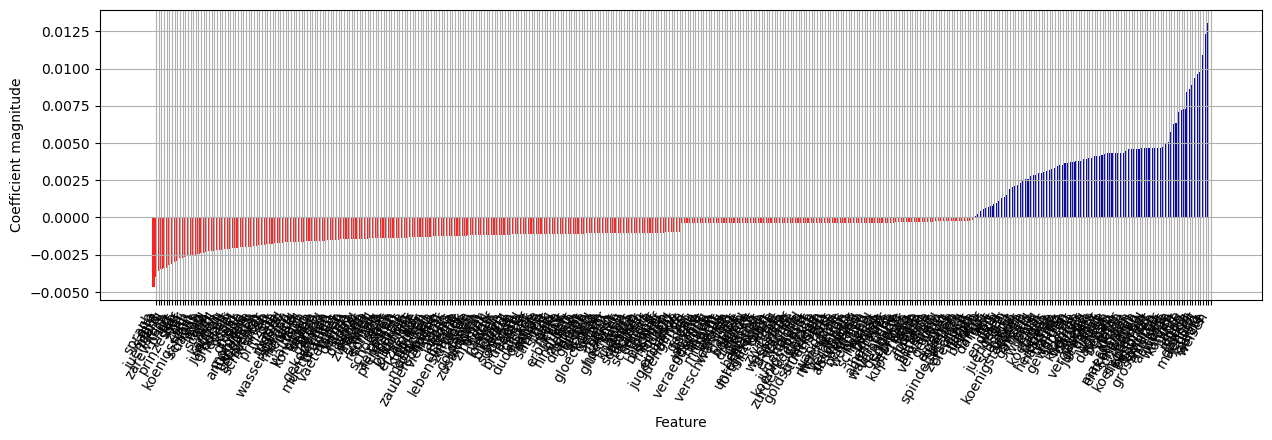

In [142]:
s_zahl = 200  #78 Anzahl der Merkmale, die in der Visualisierung dargestellt werden sollen

import matplotlib.pyplot as plt  
import mglearn

#79 Visualisieren der Koeffizienten des logistischen Regressionsmodells
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,  #80 Koeffizienten des Modells
    feature_names,  n_top_features=s_zahl  #81 Merkmalsnamen und Anzahl der Merkmale, die visualisiert werden sollen
)

#82 Anzeigen des Gitters in der Visualisierung
plt.grid()

#83 Anzeigen der Visualisierung
plt.show()
#plt.savefig(s_zahl+'.png', dpi=80)

In [143]:
#84 Extrahieren der Koeffizienten aus dem logistischen Regressionsmodell
gio = grid.best_estimator_.named_steps["logisticregression"].coef_[0]

#85 Sortieren der Indizes der Koeffizienten nach ihrer Größe
n_top = np.argsort(gio)

#86 Sortieren der Koeffizienten nach ihrer Größe
z_top = np.sort(gio)

#87 Extrahieren der Top-Merkmale mit den höchsten Koeffizienten
text_pos = feature_names[n_top[-s_zahl:]]
zahl_pos = gio[n_top[-s_zahl:]]

#88 Extrahieren der Top-Merkmale mit den niedrigsten Koeffizienten
text_neg = feature_names[n_top[0:s_zahl]]
zahl_neg = gio[n_top[0:s_zahl]]

#89 Ausgabe der positiven Merkmale und ihrer Koeffizienten
print("Positive Merkmale:\n{}".format(text_pos))

#89.1 Ausgabe der negativen Merkmale und ihrer Koeffizienten
# print("Negative Merkmale:\n{}".format(text_neg))

#89.2 Ausgabe der Koeffizienten der positiven Merkmale
# print("Positive coef:\n{}".format(zahl_pos))

#89.3 Ausgabe der Koeffizienten der negativen Merkmale
# print("Negative coef:\n{}".format(zahl_neg))

Positive Merkmale:
['aelter' 'juenglinge' 'nie' 'rat' 'bein' 'genau' 'fische' 'ehe' 'weitere'
 'gekonnt' 'veraenderung' 'hufen' 'namen' 'laerm' 'mitsamt' 'licht'
 'wenig' 'neuen' 'verloren' 'verschwanden' 'lag' 'papier' 'gabe' 'behielt'
 'legen' 'dreimal' 'felde' 'glueck' 'abkunft' 'herrsche' 'nennst'
 'unterthanen' 'fortgezogen' 'mittleren' 'brust' 'ehre' 'nase' 'zweimal'
 'ans' 'wackeren' 'speiste' 'traenkte' 'zwoelf' 'erwachte' 'los' 'mache'
 'jugendland' 'koenigssohne' 'fliesst' 'zurueckgekehrt' 'fisch' 'weckte'
 'kruege' 'goldstimmigen' 'stuecklein' 'thaten' 'eile' 'fast' 'wanderte'
 'menschen' 'wuensche' 'sechs' 'trunk' 'vergelten' 'belohnen' 'abschiede'
 'wunder' 'weibe' 'beistand' 'fuhren' 'weilchen' 'busen' 'naehe'
 'schnabel' 'heisst' 'bitten' 'ohren' 'herrscht' 'abenteuer' 'hilfe'
 'wallfisches' 'versuche' 'nahe' 'gehoerte' 'schlaeft' 'bisher' 'uebrigen'
 'kupferberg' 'rabe' 'steh' 'fegte' 'bogen' 'fluesse' 'seen' 'flatterte'
 'maehne' 'kraft' 'verweilen' 'grind' 'gewinn' 'h

In [144]:
kfz = range(s_zahl)  #90 Erstellen einer Sequenz von Zahlen von 0 bis s_zahl-1
folgenum = 0  #91 Initialisieren des Zählers für die Folgennummer

#92 Iteration über die Zahlen in der Sequenz kfz
for x in kfz:
    folgenum += 1  #93 Inkrementieren der Folgennummer
    #97 Berechnen der Summe der Koeffizienten für das aktuelle Element in der Liste
    vollliste = zahl_pos[s_zahl - folgenum] + zahl_neg[s_zahl - folgenum]
    #94 Runden der Summe auf drei Dezimalstellen
    rundliste = round(vollliste, 3)
    #95 Ausgabe der gerundeten Summe und der aktuellen Zahl in der Sequenz
    print(rundliste, '-', x)

0.012 - 0
0.011 - 1
0.01 - 2
0.009 - 3
0.009 - 4
0.008 - 5
0.008 - 6
0.008 - 7
0.007 - 8
0.006 - 9
0.006 - 10
0.006 - 11
0.005 - 12
0.005 - 13
0.005 - 14
0.004 - 15
0.004 - 16
0.004 - 17
0.004 - 18
0.004 - 19
0.004 - 20
0.004 - 21
0.004 - 22
0.004 - 23
0.004 - 24
0.004 - 25
0.004 - 26
0.004 - 27
0.004 - 28
0.004 - 29
0.004 - 30
0.003 - 31
0.003 - 32
0.003 - 33
0.003 - 34
0.003 - 35
0.003 - 36
0.003 - 37
0.003 - 38
0.003 - 39
0.003 - 40
0.003 - 41
0.003 - 42
0.003 - 43
0.003 - 44
0.003 - 45
0.003 - 46
0.003 - 47
0.003 - 48
0.003 - 49
0.003 - 50
0.003 - 51
0.003 - 52
0.003 - 53
0.003 - 54
0.002 - 55
0.002 - 56
0.002 - 57
0.002 - 58
0.002 - 59
0.002 - 60
0.002 - 61
0.002 - 62
0.002 - 63
0.002 - 64
0.002 - 65
0.002 - 66
0.002 - 67
0.001 - 68
0.001 - 69
0.001 - 70
0.001 - 71
0.001 - 72
0.001 - 73
0.001 - 74
0.001 - 75
0.0 - 76
0.0 - 77
0.0 - 78
-0.0 - 79
-0.0 - 80
-0.0 - 81
-0.0 - 82
-0.0 - 83
-0.001 - 84
-0.001 - 85
-0.001 - 86
-0.001 - 87
-0.001 - 88
-0.001 - 89
-0.001 - 90
-0.001 - 91
-0

In [145]:
#96 Schwelenwert bestimmen
sw=79

In [146]:
filename ='!_neu'  #97 Der Dateiname für die CSV-Datei (ohne Erweiterung)
tit = (text_pos[s_zahl-sw:s_zahl])  #102 Die Topmerkmale, die geschrieben werden soll

#98 Öffnen der CSV-Datei zum Schreiben ('wt' für Schreiben im Textmodus)
with open (filename+'.csv', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f)  #99 Initialisieren des CSV-Schreibers
    writer.writerow(tit)  #100 Schreiben der Topmerkmalen in die CSV-Datei

# Messdaten aufbereiten

In [147]:
maerchen = ""  #101 Eine leere Zeichenkette, in der Daten für Märchen gesammelt werden.
import xml.etree.ElementTree as ET  #102 Importieren der ElementTree-Bibliothek zum Parsen von XML.
root_node = ET.parse('Textkorpus.xml').getroot()  #103 Parsen der XML-Datei und Zugriff auf das Wurzelelement.
never_saved = True  #104 Ein boolean-Wert, der angibt, ob Daten bereits gespeichert wurden oder nicht.
#105 Iteration durch jedes 'text'-Element in der XML-Datei.
for corp in root_node.findall (".//{http://www.tei-c.org/ns/1.0}teiCorpus"):
    if "" in corp.attrib["n"]:
        for ganze in corp.findall(".//{http://www.tei-c.org/ns/1.0}text"):
            #106 Überprüfung, ob das Attribut 'deu' in der 'id'-Eigenschaft des 'text'-Elements vorhanden ist.
            if ('dummy' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']):
                #107 Iteration durch jeden Absatz im 'body' des 'text'-Elements.
                for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
                    for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                        #108 Iteration durch jede 'seg'-Phrase im Absatz.
                        for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}seg"):
                            #109 Extrahieren von Labels und Inhalten aus den Attributen und dem Text der Phrase.
                            labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                            labelb1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b1}ana']
                            labelb2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b2}ana']
                            labelb3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b3}ana']
                            labelb4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b4}ana']
                            labelb5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b5}ana']
                            labelc1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c1}ana']
                            labelc2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c2}ana']
                            labelc3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c3}ana']
                            labelc4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c4}ana']
                            labelc5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c5}ana']
                            labeld = phrase.attrib['{www.dglab.uni-jena.de/vmf/d}ana']
                            #110 Die Quelle wird aus dem Attribut 'id' der 'ganze'-Schleife extrahiert.
                            quelle = ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                            #111 Der Inhalt wird in Kleinbuchstaben umgewandelt und formatiert.
                            inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                                      .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                                      .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                                      .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                                      .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                                      .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                                      .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                                      .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                                      .replace(')','').replace('*','').replace("\n","\n")
                                      .replace("'''",""))
                            #112 Überprüfung, ob labela mit 'a' beginnt und nicht gleich 'N' ist.
                            if labela.startswith('N'):
                                    #113 Konstruktion des Datensatzes für das Märchen und Anhängen an die 'maerchen'-Zeichenkette.
                                    maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','+labelc2+','+
                                                 labelb3+','+labelc3+','+labelb4+','+labelc4+','+labelb5+','+labelc5+','+
                                                 labeld+','+inhalt+',0'+'\n')                       
with open("text.csv", 'w', encoding='utf-8') as f:
     #114 Schreiben der Kopfzeile in die CSV-Datei.
    f.write('quelle,labela,labelb1,labelc1,labelb2,labelc2,labelb3,labelc3,labelb4,labelc4,labelb5,labelc5,labeld,inhalt,index_binar')
    f.write('\n')
    #115 Schreiben der gesammelten Daten in die CSV-Datei.
    f.write(maerchen)

In [148]:
#116 Öffnen der CSV-Datei im Lesemodus und Lesen ihres Inhalts
with open(filename+'.csv', 'r', encoding='utf-8') as file:
    file_contents = file.read().replace(",", " ").replace("\n", "")  #117 Entfernen von Kommas und Zeilenumbrüchen

#118 Zusammenstellen des neuen Inhalts mit dem Dateinamen und zusätzlichen Metadaten
frt_contents = filename+',N,N,N,N,N,N,N,N,N,N,N,N'+','+file_contents+',0'

#119 Löschen der ursprünglichen CSV-Datei
import os 
os.remove(filename+'.csv')

In [149]:
row = [frt_contents]  #120 Erstellen einer neuen Zeile mit dem zusammengestellten Inhalt

#121 Öffnen der CSV-Datei im Lesemodus und Lesen der vorhandenen Zeilen
with open("text.csv", 'r', encoding='utf-8') as readFile:
    rd = csv.reader(readFile)  #122 Initialisieren des CSV-Lesers
    lines = list(rd)  #123 Lesen der Zeilen und Konvertieren in eine Liste

    #124 Einfügen der neuen Zeile an der zweiten Position in die Liste der Zeilen
    lines.insert(1, row)

#125 Öffnen der CSV-Datei im Schreibmodus und Schreiben der aktualisierten Zeilen
with open("text.csv", 'wt', newline='', encoding='utf-8') as writeFile:
    wt = csv.writer(writeFile)  #126 Initialisieren des CSV-Schreibers
    wt.writerows(lines)  #127 Schreiben der Zeilen in die Datei

#133 Öffnen der ursprünglichen und neuen CSV-Dateien zum Lesen bzw. Schreiben
fin = open('text.csv', 'r', encoding='utf-8')
fout = open('text_reich.csv', "wt", encoding='utf-8')

#128 Iteration über die Zeilen der ursprünglichen CSV-Datei
for kfz in fin:
    #129 Schreiben der Zeile in die neue Datei mit Entfernung bestimmter Zeichenfolgen
    fout.write(kfz.replace('"', ''))
#130 Schließen beider Dateien
fin.close()
fout.close()

In [150]:
#131 Funktion für die Beseitigung der leeren Datensätzen
def delete_records_with_empty_field(file_path, field_name):
    
    #132 Öffnen der CSV-Datei im Lese-Modus
    with open(file_path, 'r') as file:
        #133 Lesen der Daten als Liste von Dictionaries
        reader = csv.DictReader(file)
        rows = list(reader)

    #134 Überprüfen, ob das Feld in den Daten leer ist
    filtered_rows = [row for row in rows if row[field_name]]

    #135 Öffnen der CSV-Datei im Schreibmodus und Schreiben der verbleibenden Datensätze
    with open(file_path, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=reader.fieldnames)
        writer.writeheader()
        writer.writerows(filtered_rows)

#136 Beispielaufruf der Funktion
file_path = 'text_reich.csv'  #137 Passe den Pfad zu deiner CSV-Datei an
field_name = 'inhalt'  #138 Passe den Namen des Feldes an, das überprüft werden soll
delete_records_with_empty_field(file_path, field_name)

In [151]:
t_corpus = []  #139 Eine leere Liste zum Speichern der Textdaten
df = pd.read_csv('text_reich.csv', encoding='utf-8')  #140 Einlesen der CSV-Datei in ein Pandas DataFrame
file = 'text_reich.csv'  #141 Der Dateiname der CSV-Datei

#142 Öffnen der CSV-Datei im Lesemodus und Extrahieren der Textdaten
with open(file, "rt", encoding='utf-8') as maerchen:
    maercho = df.inhalt  #143 Extrahieren der Spalte "inhalt" aus dem DataFrame
    reader = csv.reader(maercho)  #144 Initialisieren des CSV-Lesers
    for row in reader:
        lst = str(row)  #145 Konvertieren der gelesenen Zeile in eine Zeichenfolge
        t_corpus.append(lst)  #146 Hinzufügen der Zeichenfolge zur Liste der Textdaten

## Vorhersage durch Logistic Regression

In [152]:
#147 Vorhersagen für die Testdaten mit dem trainierten Modell durchführen
mod_pred = grid.predict(t_corpus)

#148 Iteration über die Indizes und Vorhersagen
for index, prediction in enumerate(mod_pred):
    #149 Überprüfen, ob die Vorhersage positiv ist
    if prediction == 1:
        #150 Ausgabe des Index und der Vorhersage für positiv bewertete Datensätze
        print('Positiv bewerteter Datensatz: {}'.format(index))

In [153]:
#151 Vorhersagen für die Testdaten mit der Methode `predict_proba` durchführen
all_pred = grid.predict_proba(t_corpus)

#152 Sortieren der Indizes der Testdaten basierend auf der Wahrscheinlichkeit positiver Vorhersagen in absteigender Reihenfolge
sort_index = np.flip(all_pred[:, 1].argsort())

#153 Iteration über die sortierten Indizes der Testdaten
for num_pos in sort_index:
    #154 Extrahieren der Wahrscheinlichkeit der positiven Vorhersage für das aktuelle Datenpunkt
    pos = all_pred[num_pos][1]
    
    #155 Iteration über die Indizes und Datenpunkte der Testdaten
    for i, t_corpus_element in enumerate(t_corpus):
        #156 Überprüfen, ob der Index mit dem sortierten Index übereinstimmt und die Wahrscheinlichkeit hoch genug ist
        if i == num_pos and num_pos >= 0 and pos >= 0.001:
            #157 Ausgabe des Index, der Wahrscheinlichkeit, der Quelle, dem Inhalt und der Index-Binarisierung
            print(num_pos, '-', pos, '-', df.quelle[num_pos], '-', df.inhalt[num_pos],
                  '-', df.index_binar[num_pos], '\n')

0 - 0.1356650507147786 - !_neu - ward reich juengsten drei schoene nacht sieben koenigstochter guten zweite ganzen haus bald wusste lebte wol koenigin tages helfen lebens herrschte nahmen beide traurig reiche geworden sagten alt koepfe koenigs weinen dafuer frage irgend vergangen grosses juengste daher klug weinte krank dachten begab bekam ruhe verlor vielen soehne maechtiges entkommen merken schweren lebten heilen koenigreiche siebenmal blindheit ermordet berufen konnten grossmutter mittlere weit aelteste wurde wurden konnte welt jahre leben mittel gebe gesicht maenner jenseit blind koenig aerzte weisen - 0 

6150 - 0.042262192644628 - dummy537 - dor wir mal eins en koenig de ne huebsche dochter hadd dei verleiwt sik in einen soldaten de koenig wull sei em nich girn laten wuest œwer nich woans hei dat anfangen suell denn grad tau ne seggen wull hei ok nich donn tauletzt kem hei up den gedanken em na vagel fenus tau schicken uem em drei feddern tau halen hei dacht dorbi œwer hei wuerr 

4689 - 0.029993956348819673 - dummy367 - wie der koch hoerte dass das laemmchen sprechen konnte und so traurige worte zu dem fischchen hinabrief erschrak er und dachte es muesste kein natuerliches laemmchen sein sondern waere von der boesen frau im haus verwuenscht da sprach er sei ruhig ich will dich nicht schlachten nahm ein anderes tier und bereitete das fuer die gaeste und brachte das laemmchen zu einer guten baeuerin der erzaehlte er alles was er gesehen und gehoert hatte die baeuerin war aber gerade die amme von dem schwesterchen gewesen vermutete gleich wers sein wuerde und ging mit ihm zu einer weisen frau da sprach die weise frau einen segen ueber das laemmchen und fischchen wovon sie ihre menschliche gestalt wiederbekamen und danach fuehrte sie beide in einen grossen wald in ein klein haeuschen wo sie einsam aber zufrieden und gluecklich lebten - 0 

251 - 0.029991007588898784 - dummy18 - nun begann der koenig die erste aufgabe ist geloest und nun geht es an die zweite merk a

2472 - 0.029499775925542943 - dummy172 - endlich als der koenig nun schon gar weit umhergereist ist und keine getroffen hat ohne fleck kommt er eines abends spaet vor ein dorf an dessen ende auf der anhoehe vor dem orte sieht er schon von ferne ein licht brennen geht darauf zu und bittet um ein nachtquartier was ihm auch mit freuden gewaehrt wird in diesem hause aber hat der dorfhirte gewohnt der hat eine tochter gehabt von achtzehn jahren die leute tragen milch und brot auf das schmeckt dem koenig der sehr ermuedet gewesen ist sehr koestlich da tritt die tochter des hirten herein die war so wunderschoen von antlitz und gestalt und der koenig verliebte sich in sie in der fruehe des an dern morgens noch ehe der hirt aufgestanden ist um das vieh auszutreiben blickt er schon in seinen spiegel und siehe da der spiegel zeigt ihm dass die schoenheit der hirtentochter fleckenlos ist da haelt er sogleich bei dem hirten um sie an und bittet dass dieser seine tochter mit ihm ziehen lassen moege 

3198 - 0.029191017855214545 - dummy267 - es ist auch einmal ein maedchen gewesen das wollte bei der trauung vor dem altar noch nein sagen als der pfarrer sie fragte ob sie den mann wolle da fing aber der braeutigam bitterlich an zu weinen als die braut sah wie der braeutigam weinte sagte sie nun wenn es denn nicht anders sei so sollten sie ihr den mann nur hergeben und damit wurden sie getraut - 0 

3460 - 0.029190839617329822 - dummy292 - fragte das graumaennchen weiter - 0 

4491 - 0.029190839617329822 - dummy354 - fragte sie weiter - 0 

3209 - 0.029190839617329822 - dummy269 - gekocht fragte der richter und dann noch gesaet wie soll ich das verstehen - 0 

3027 - 0.029190839617329822 - dummy249 - also bestellt es auch der diener dem ritter und der fragte wie war dir denn - 0 

199 - 0.029190839617329822 - dummy12 - heissen denn alle kraeuter nach dem wolf fragte rotkaeppchen - 0 

1494 - 0.029190839617329822 - dummy108 - da fragte der eine den andern was machst du da - 0 

347 - 0.

3928 - 0.029182776000499674 - dummy313 - zeig mir meinen braeutigam einmal - 0 

3927 - 0.029182776000499674 - dummy313 - von krystall - 0 

4376 - 0.029182776000499674 - dummy342 - so zieht denn herzhaft in den streit - 0 

4390 - 0.029182776000499674 - dummy343 - rapunzel rapunzel - 0 

3926 - 0.029182776000499674 - dummy313 - blanker ball - 0 

3923 - 0.029182776000499674 - dummy313 - zu nr 2 - 0 

3929 - 0.029182776000499674 - dummy313 - das maerchen nr 3 - 0 

4374 - 0.029182776000499674 - dummy342 - denn ihm gebuehrt die ehr allei - 0 

4393 - 0.029182776000499674 - dummy343 - rapunzel rapunzel - 0 

3921 - 0.029182776000499674 - dummy313 - baerenheid adelheid und wallfild - 0 

3932 - 0.029182776000499674 - dummy313 - freytag - 0 

3920 - 0.029182776000499674 - dummy313 - in dem maerchen nr 1 - 0 

3939 - 0.029182776000499674 - dummy313 - zu dem bestreichen der leichensteine mit dem speichel des vogels ist zu vergleichen jakob grimms deutsche mythologie s 646 bedeutungsvoll ist 

175 - 0.029182776000499674 - dummy10 - seh dich nicht um - 0 

2443 - 0.029182776000499674 - dummy170 - wache wache ronde raus - 0 

171 - 0.029182776000499674 - dummy10 - graue mich grabble mich - 0 

2442 - 0.029182776000499674 - dummy170 - wache wache ronde raus - 0 

2439 - 0.029182776000499674 - dummy170 - wache wache ronde raus - 0 

2438 - 0.029182776000499674 - dummy170 - wache wache ronde raus - 0 

166 - 0.029182776000499674 - dummy10 - graue mich grabble mich - 0 

2435 - 0.029182776000499674 - dummy170 - wache wache ronde raus - 0 

2434 - 0.029182776000499674 - dummy170 - wache wache ronde raus - 0 

2623 - 0.029182776000499674 - dummy195 - horle horle horle wip - 0 

2624 - 0.029182776000499674 - dummy195 - wie balde spinn ich dich - 0 

6005 - 0.029182776000499674 - dummy517 - und lassn sich mit jagen - 0 

5594 - 0.029182776000499674 - dummy467 - kywitt kywitt wat voern schoeoen vagel buen ik - 0 

5579 - 0.029182776000499674 - dummy467 - sucht alle meine benichen - 0 


621 - 0.029182776000499674 - dummy45 - ich sitze auf der lade - 0 

5166 - 0.029182776000499674 - dummy433 - halbaus - 0 

3260 - 0.029182776000499674 - dummy272 - da fragten mich alle leute - 0 

5198 - 0.029182776000499674 - dummy435 - katze kehr die stube aus - 0 

5175 - 0.029182776000499674 - dummy435 - wie kommts dass sie alleine sitzt - 0 

5178 - 0.029182776000499674 - dummy435 - brock mir wecke und milch ein - 0 

3252 - 0.029182776000499674 - dummy272 - wie ich meine kuh wollte heissen - 0 

3251 - 0.029182776000499674 - dummy272 - da fragten mich alle leute - 0 

5182 - 0.029182776000499674 - dummy435 - sie sitzt droben in der kammer - 0 

5183 - 0.029182776000499674 - dummy435 - beweint ihren jammer - 0 

3244 - 0.029182776000499674 - dummy272 - wie ich mein schwein wollte heissen - 0 

3243 - 0.029182776000499674 - dummy272 - da fragten mich alle leute - 0 

5152 - 0.029182776000499674 - dummy430 - dar sitt en koenigsdochter in - 0 

3270 - 0.029182776000499674 - dummy272 

1927 - 0.029162980710079365 - dummy138 - sie haette wohl noch weiter gesungen da brach ihr der faden und sie erlosch wie ein licht nun war es ganz nacht die kinder fasste ein grausen sie sprangen mit klaeglichem geschrei das eine dahin das andere dorthin ueber felsen und kluefte und verlor eins das andere - 0 

1698 - 0.029162492540759734 - dummy118 - der teufel denkt ach wenn das ding so klingt so gehst du lieber wieder heim waere ich doch vom anfang an zu hause geblieben  er sinnt auf rache gegen die weiber und spricht he bruder du bist auch arm ich will dich reich machen du musst mir aber folgen der koehler spricht o ja reich waere ich gerne und ich will tun was du nur haben willst da spricht der teufel hoere bruder koehler ich weiss einen koenig der hat drei prinzessinnen da will ich in die eine fahren und du sollst der doktor sein wenn ich in die prinzessin gefahren bin so wird der koenig einen aufruf ergehen lassen nach einem doktor der knall und fall austreiben kann da gehst du 

6121 - 0.029086880060823696 - dummy531 - ein bote wird in ein wirthshaus geschickt mit drei toechtern deren eine seinem herrn zu willen gewesen auf seine raethselhafte ansprache erwidert nun die betroffene in einer ihm unverstaendlichen weise dass sie nach ihrer niederkunft mit dem kinde zu dem geliebten sich begeben werde das gespraech selbst lautet - 0 

4014 - 0.02908683373812925 - dummy313 - vergl die obige bemerkung zu nr 15 sein geheimniss verraeth in den kinder und hausmaerchen ii nr 125 ist die alte des teufels grossmutter die aufgaben des teufels sind wenig abweichend von denen in unserm maerchen vergl auch bei meier der angefuehrte teufel in unserm maerchen nr 19 stellt der teufel den ihm im grunde schon verfallenen soldaten noch drei aufgaben hier die loesung dreier raethsel aehnlich in nr 23 - 0 

3956 - 0.02908666413523159 - dummy313 - moeglich - 0 

2706 - 0.029086241020733122 - dummy208 - so zog der alte soldat mit den andern immer weiter und weiter bis sie in ein land k

5407 - 0.029023373748470874 - dummy456 - ich sprang nur ueber graebelein - 0 

5423 - 0.029023373748470874 - dummy456 - ich sprang nur ueber graebelein - 0 

2931 - 0.029023238190419996 - dummy231 - da sprachen die handwerksburschen zu einander haben wir nicht auch eine grosse eiche in schnorrwitz darauf der mond festgebunden werden kann so lasst uns von da wagen und pferde holen und den mond stehlen und in unsre landschaft fahren auf dass wir daselbst das schoene geld damit verdienen also thaten sie auch holten wagen und pferde stiegen auf den berg darauf die eiche stand bohrten ein loch in den mond und liessen ihn an einem seil herunter danach fuhren sie ihn gen schnorrwitz indem sie ihn unterwegs auf dem wagen zugedeckt hatten befestigten ihn dort auf der hohen eiche und die landschaft schnorrwitz wurde sehr bluehend weil die leute dort nun tag und nacht arbeiten konnten die vier aber erhielten in jeder woche fuer den mondenschein ihr gewisses geld ausgezahlt - 0 

3595 - 0.02902299

1828 - 0.0289698301666342 - dummy130 - die toten sammeln schon ihr gebein - 0 

3104 - 0.0289698301666342 - dummy255 - einmal bin ich schon dagewesen - 0 

3745 - 0.02896839210345855 - dummy311 - mit der er sich schmieren muesse um das schwert regieren zu koennen ferner einen - 0 

4011 - 0.028967065456141798 - dummy313 - der goldene becher die goldene tischdecke und die goldene trompete - 0 

5716 - 0.028965380799567713 - dummy477 - da sass nun die arme muellerstochter und wusste um ihr leben keinen rat sie verstand gar nichts davon wie man stroh zu gold spinnen konnte und ihre angst ward immer groesser dass sie endlich zu weinen anfing da ging auf einmal die tuere auf und trat ein kleines maennchen herein und sprach guten abend jungfer muellerin warum weint sie so sehr ach antwortete das maedchen ich soll stroh zu gold spinnen und verstehe das nicht sprach das maennchen was gibst du mir wenn ich dirs spinne mein halsband sagte das maedchen das maennchen nahm das halsband setzte sich 

433 - 0.028858936112749044 - dummy29 - was fuer ein schoener vogel bin ich - 0 

454 - 0.028858936112749044 - dummy29 - was fuer ein schoener vogel bin ich - 0 

1545 - 0.028858936112749044 - dummy109 - was fuer ein schoener vogel bin ich - 0 

1536 - 0.028858936112749044 - dummy109 - was fuer ein schoener vogel bin ich - 0 

407 - 0.028858936112749044 - dummy29 - was fuer ein schoener vogel bin ich - 0 

1580 - 0.028858936112749044 - dummy109 - was fuer ein schoener vogel bin ich - 0 

1554 - 0.028858936112749044 - dummy109 - was fuer ein schoener vogel bin ich - 0 

1563 - 0.028858936112749044 - dummy109 - was fuer ein schoener vogel bin ich - 0 

398 - 0.028858936112749044 - dummy29 - was fuer ein schoener vogel bin ich - 0 

1614 - 0.028858936112749044 - dummy109 - was fuer ein schoener vogel bin ich - 0 

416 - 0.028858936112749044 - dummy29 - was fuer ein schoener vogel bin ich - 0 

389 - 0.028858936112749044 - dummy29 - was fuer ein schoener vogel bin ich - 0 

331 - 0.02885880

4152 - 0.028697883695805674 - dummy313 - von jemand wegen des durch den hund herbeigefuehrten misverstaendnisses aufhoert zu essen findet sich auch bei meier nr 52 hans holt sich eine frau - 0 

2395 - 0.02869445823855418 - dummy165 - es war einmal ein reicher edelmann der hatte drei toechter die hiessen baerenheid adelheid und wallfild der wusste nicht hauszuhalten wurde ganz arm und musste auf die jagd gehen um seinen unterhalt zu suchen er schoss einen hasen darauf aber kam der baer weil der edelmann von seinen unterthanen geschossen und sprach du hast einen von meinen unterthanen getoedtet das kostet dich dein leben nur wenn ich deine aelteste tochter baerenheid bekommen kann will ich dir verzeihen und du sollst alles wieder in fuelle haben der edelmann verspricht dem baeren die tochter und als er zu haus ankommt hat er alles in fuelle wie ers nur verlangt der baer kommt den andern tag und holt baerenheid ab das vermoegen vom baeren ist aber im umsehen wieder verschwunden und der e

2599 - 0.028504747593028783 - dummy191 - in einer andern muehle konnte der mueller keinen muehlburschen behalten und versprach dem der die muehle von zwoelf zwergen befreite die alle nacht dort hinkamen seine tochter zur frau da kam ein alter soldat als der die erste nacht in der muehle wachte erschienen auch gleich die zwoelf zwerge die hatten ihren sitz da wo korn aufgeschuettet wurde speisten aber um mitternacht am muehltische der auf einmal mit den schoensten silbernen und goldenen geschirren gedeckt war da warf der alte soldat mit einem trumm 1 nach ihnen da waren auch gleich vier zwerge todt die andern ergriffen die flucht hinter denen schoss er drei pistolen ab und hoerte wie sie einander zuriefen lasst nur den alten - 0 

3884 - 0.028504362306171697 - dummy313 - die meiste eigene thaetigkeit glaubte ich bei denjenigen maerchen anwenden zu koennen welche keine eigentlich mythischen zuege enthalten bei einem paar dieser maerchen habe ich sogar der lockung das einzelne mehr auszum

2059 - 0.028259486628479626 - dummy146 - die moecht ich hoeren sprach rupert der laengst gemerkt hatte mit wem ers zu tun denn zu dem einen stiefel hatte der schuster wie es schien ein absonderliches mass genommen gerade als wenn er einem pferde einen stiefel gemacht  solls etwa die seligkeit sein  so dank ich schoenstens  fuhr rupert fort - 0 

3440 - 0.028257475082730212 - dummy290 - der soldat zog hierauf seine karten wieder aus der tasche zeigte sie dem major und sagte sobald ich ein as sehe so denke ich dass ein gott ist der himmel und erde erschaffen hat eine zwei die zwei naturen in christo naemlich die goettliche und die menschliche eine drei die drei personen in der gottheit eine vier die vier evangelisten matthaeus marcus lucas und johannes eine fuenf die fuenf wunden christi eine sechs dass gott in sechs tagen die welt erschaffen hat eine sieben dass er den siebenten tag zum ruhetag ausgesetzt hat eine acht zeigt mir an dass die acht in der arche das leben gerettet haben nae

605 - 0.02800731431662185 - dummy44 - als nun maria voll wut ob ihres haesslichen ansehens nach hause kam kraehte der gluckhahn ihr entgegen kikiriki da kommt die pechmarie kikiriki und ihre mutter wandte sich voll abscheu von ihr und konnte nun ihre haessliche tochter nicht vor leuten sehen lassen die hart gestraft blieb darum dass sie so auf golderpicht gewesen - 0 

1753 - 0.02800731431662185 - dummy124 - als nun maria voll wut ob ihres haesslichen ansehens nach hause kam kraehte der gluckhahn ihr entgegen kikiriki da kommt die pechmarie kikiriki und ihre mutter wandte sich voll abscheu von ihr und konnte nun ihre haessliche tochter nicht vor leuten sehen lassen die hart gestraft blieb darum dass sie so auf golderpicht gewesen - 0 

3527 - 0.02800726957707039 - dummy302 - allein der junge kaufmann war nicht im meere ertrunken die wogen hatten ihn wieder aus der meerestiefe heraufgespuelt und er war gluecklich bis ans ufer geschwommen dort stieg er aus dem meere legte sich in das sch

1980 - 0.027658177049995583 - dummy141 - da ging die tuer des haeusleins auf und trat ein steinaltes krummgebuecktes triefaeugiges muetterlein heraus von nicht geringer haesslichkeit gesicht und stirne voll runzeln und in mitten eine grosse grosse nase hatte auch grasgruene augen die kinder erschraken nicht wenig die alte aber tat ganz freundlich und sagte ei traute kindlein kommt doch herein ins haeuschen kommt doch herein da gibts noch viel bessern kuchen - 0 

5803 - 0.02765768925648604 - dummy484 - nun gingen die zwei brueder zusammen nach haus und erzaehlten einander auf dem weg ihre schicksale und als der juengste sagte er waere an des koenigs statt herr im ganzen lande sprach der andere das hab ich wohl gemerkt denn als ich in die stadt kam und fuer dich angesehen ward da geschah mir alle koenigliche ehre die junge koenigin hielt mich fuer ihren gemahl und ich musste an ihrer seite essen und in deinem bett schlafen wie das der andere hoerte ward er so eifersuechtig und zornig da

2767 - 0.02718627467124553 - dummy213 - als nun die gans die erlaubniss hatte hob sie sich mit den fuessen mehrmals ein wenig vom boden auf machte dabei auch die fluegel aus einander und begann vor dem fuchs recht artig zu tanzen wie die gaense thun bevor sie anfangen zu fliegen nachdem sie aber so eine weile zum grossen vergnuegen des fuchses getanzt hatte flog sie davon da hatte der fuchs nichts als das nachsehen und weil dies bei einem gaensebraten wie du weisst nicht viel sagen will so sprach er wie diesmal soll es mir gewiss nicht wieder ergehen vor dem essen ist kein tanzen wieder - 0 

5727 - 0.027186132745748055 - dummy478 - als sie fortgegangen war stand das maedchen auf und ging zu seinem liebsten der roland hiess und klopfte an seine tuere als er herauskam sprach sie zu ihm hoere liebster roland wir muessen eilig fluechten die stiefmutter hat mich totschlagen wollen hat aber ihr eigenes kind getroffen kommt der tag und sie sieht was sie getan hat so sind wir verloren aber ic

1831 - 0.026617229859745753 - dummy130 - wollen wir fragte der schulmeister den pfarrer mit zaehneklappern zeit waers vorm torschluss der heilige apostel petrus ruft uns das ist keine frage aber reisegeld  ich habe mir zwanzig kronen erdarbt wisperte das schulmeisterlein ich habe hundert dicketonnen laubthaler fuer den notfall zurueckgelegt sprach der pfarrer holen wirs und neh mens mit riefen beide und taten also dann naeherten sie sich der schwarzen gestalt mit furcht und zittern diese war der meisterdieb er hatte krebse gekauft und ihnen brennende wachslichterlein auf den ruecken geklebt das waren die armen seelen hatte einen moenchsbart und eine moenchskutte und einen hopfensack in den er die beiden schwarzroecke aufnahm nachdem er ihnen ihr erspartes abgenommen jetzt schnuerte er den sack zu und schleifte ihn hinter sich her durch das dorf und durch einen tuempfel wobei er rief jetzt gehts durch das rote meer dann durch den bach jetzt gehts durch den bach kidron dann durch die sch

3426 - 0.025729544320060315 - dummy286 - zu derselbigen zeit kam jesus an der mistpfuetze vorbei und rief mensch mit goldenen gaben wache auf und der todte kutscher stand vor jesus da erzaehlte ihm jesus das unglueck seiner braut und befahl ihm sich als schwan mit goldenen federn zu verwandeln und seine braut zu erloesen da flog der schwan mit goldenen federn davon und war in kurzer zeit bei dem dritten scheiterhaufen vor demselben stand schon seine braut und er verwandelte sich vor aller augen in einen hirsch mit goldenem geweih in einen fisch mit goldenen schuppen und in einen schwan mit goldenen federn und dann in einen kutscher er erzaehlte auch den betrug des ministers da wurde der auf dem dritten scheiterhaufen verbrannt der juengling aber heirathete die prinzessin erbte spaeter das koenigreich und regierte viele jahre lang nach dem rechte - 0 

4291 - 0.025722887452898007 - dummy329 - in dem wald war es so still wie in einer kirche kein wind wehte kein bach rauschte kein vogel s

604 - 0.024476062258791453 - dummy44 - der andern maria aber wuchs der neid im herzen und sie beschloss auch fortzugehen und uebergoldet wiederzukommen ihre mutter gab ihr suessen kuchen und wein mit auf die reise und wie maria davon ass und voeglein geflogen kamen um auch mit zu schmausen jagte sie dieselben aergerlich fort ihr kuchen aber verwandelte sich unvermerkt in asche und ihr wein in mattes wasser am abend kam maria ebenfalls an thuerschemanns tore sie ging stolz zu dem goldenen hinein und klopfte dann an die haustuere wie thuerschemann auftat und nach ihrem begehren fragte sagte sie schnippisch nun ich will hier uebernachten und er brummte komm herein dann fragte er auch sie bei wem willst du schlafen bei mir oder bei hunden und katzen sie sagte schnell bei euch herr thuerschemann aber er fuehrte sie in die stube wo hunde und katzen schliefen und schloss sie hinein am morgen war mariens angesicht haesslich zerkratzt und zerbissen thuerschemann brummte wieder mit wem willst du

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Vorhersage durch Cosine Similarity

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#158 Initialisieren des TF-IDF-Vektorisierers mit bestimmten Parametern
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), 
                             min_df=2, stop_words=stpw)

#159 Erstellen des Vokabulars aus den Textdaten mit dem TF-IDF-Vektorisierer
vocabulary = vectorizer.fit_transform(t_corpus)

#160 Funktion zur Suche nach ähnlichen Dokumenten basierend auf der Kosinusähnlichkeitsmetrik
def find_similar(vocabulary, index, top_n=-1):
    #161 Berechnen der Kosinusähnlichkeitswerte zwischen dem ausgewählten Dokument und allen anderen Dokumenten
    similarities = cosine_similarity(vocabulary[index:index+1], vocabulary).flatten()
    #162 Sortieren der Dokumente basierend auf den Kosinusähnlichkeitswerten in absteigender Reihenfolge
    related_docs_indices = [i for i in similarities.argsort()[::-1] if i != index]
    #163 Auswahl der Top-n ähnlichsten Dokumente und Rückgabe ihrer Indizes und Kosinusähnlichkeitswerte
    return [(index, similarities[index]) for index in related_docs_indices][:top_n]

#164 Die TF-IDF-Vektoren für die Textdaten können über `vocabulary` abgerufen werden
# print(vocabulary)

In [155]:
n_te = 0  #165 Index des ersten Dokuments
print(df.inhalt[n_te])  #166 Ausgabe des Inhalts des ersten Dokuments

ward reich juengsten drei schoene nacht sieben koenigstochter guten zweite ganzen haus bald wusste lebte wol koenigin tages helfen lebens herrschte nahmen beide traurig reiche geworden sagten alt koepfe koenigs weinen dafuer frage irgend vergangen grosses juengste daher klug weinte krank dachten begab bekam ruhe verlor vielen soehne maechtiges entkommen merken schweren lebten heilen koenigreiche siebenmal blindheit ermordet berufen konnten grossmutter mittlere weit aelteste wurde wurden konnte welt jahre leben mittel gebe gesicht maenner jenseit blind koenig aerzte weisen


In [156]:
# 167 Iteration über die ähnlichen Dokumente zum ersten Dokument
for index, score in (find_similar(vocabulary, n_te)):
    #168 Überprüfen, ob die Ähnlichkeit größer als 0.1 ist
    if score > 0.09:
        #169 Ausgabe des Index, der Ähnlichkeit, der Quelle und des Inhalts des ähnlichen Dokuments
        print(index, '-', score, '-', df.quelle[index], '-', t_corpus[index], '\n')

6088 - 0.18100683912967072 - dummy527 - ['es war einmal ein koenig der war krank und niemand glaubte dass er mit dem leben davonkaeme er hatte aber drei soehne die waren darueber betruebt gingen hinunter in den schlossgarten und weinten da begegnete ihnen ein alter mann der fragte sie nach ihrem kummer sie sagten ihm ihr vater waere so krank dass er wohl sterben wuerde denn es wollte ihm nichts helfen da sprach der alte ich weiss ein mittel das ist das wasser des lebens wenn er davon trinkt so wird er wieder gesund es ist aber schwer zu finden der aelteste sagte ich will es schon finden ging zum kranken koenig und bat ihn er moechte ihm erlauben auszuziehen um das wasser des lebens zu suchen denn das koennte ihn allein heilen nein sprach der koenig die gefahr dabei ist zu gross lieber will ich sterben er bat aber so lange bis der koenig einwilligte der prinz dachte in seinem herzen bringe ich das wasser so bin ich meinem vater der liebste und erbe das reich'] 

487 - 0.1318807343276671